# Inference


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy.spatial import distance

def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] +=e[index]
    
    return im2


def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1 - im2[index]
    
    return im2




prop = 0.7
varSigma = 0.1
im = imread('pug-done.jpg')
im = im/255
height = im.shape[0] 
width = im.shape[1]
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap="gray")

imG = add_gaussian_noise(im,prop,varSigma)
axG = fig.add_subplot(132)
axG.imshow(imG,cmap="gray")

imSP = add_saltnpeppar_noise(im,prop)
axSP = fig.add_subplot(133)
axSP.imshow(imSP,cmap="gray")

plt.show()

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


<Figure size 640x480 with 3 Axes>

In [2]:
def neighbours(i,j,M,N,size =8):
    if size ==4:
        if( i==0 and j ==0):
            n = [(0,1),(1,0)]
        elif i==0 and j == N-1:
            n == [(0,N-2),(1,N-1)]
        elif i == M-1 and j ==0:
            n = [(M-1,1),(M-2,0)]
        elif i == M-1 and j ==N-1:
            n = [(M-1,N-2),(M-2,N-1)]
        elif i == 0:
            n = [(0,j-1), (0,j+1),(1,j)]
        elif i ==M-1:
            n = [(M-1,j-1),(M-1,j+1),(M-2,j)]
        elif j == 0:
            n = [(i-1,0),(i+1,0),(i,1)]
        elif j == N-1:
            n = [(i-1,N-1),(i+1,N-1),(i,N-2)]
        else:
            n = [(i-1,j),(i+1,j),(i,j-1), (i,j+1)]
        return n
    if size ==8:
        if( i==0 and j ==0):
            n = [(0,1),(1,0),(1,1)]
        elif i==0 and j == N-1:
            n = [(0,N-2),(1,N-1),(1,N-2)]
        elif i == M-1 and j ==0:
            n = [(M-1,1),(M-2,0),(M-2,1)]
        elif i == M-1 and j ==N-1:
            n = [(M-1,N-2),(M-2,N-1),(M-2,N-2)]
        elif i == 0:
            n = [(0,j-1), (0,j+1),(1,j),(1,j-1),(1,j+1)]
        elif i ==M-1:
            n = [(M-1,j-1),(M-1,j+1),(M-2,j),(M-2,j-1),(M-2,j+1)]
        elif j == 0:
            n = [(i-1,0),(i+1,0),(i,1),(i-1,1),(i+1,1)]
        elif j == N-1:
            n = [(i-1,N-1),(i+1,N-1),(i,N-2),(i-1,N-2),(i+1,N-2)]
        else:
            n = [(i-1,j),(i+1,j),(i,j-1), (i,j+1),(i-1,j-1),(i-1,j+1),(i+1,j-1),(i+1,j+1)]
       
        return n

    
    
                

## Question 1

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


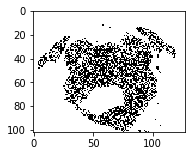

In [3]:
def kronecker(a,b):
#     print(a,b)
    if (b > 0):
        b = 1 
    else: 
        b = -1
   
    if (a == b):
        return 1
    return -1
    
def energy(x,im,indices,val,curpixel,alpha,beta):
    energy = 0
    for i in range(len(indices)):
          energy += alpha*(1-kronecker(val,im[curpixel])) + beta*(1-kronecker(val,x[indices[i]]))                                                           
    return energy
        
def ICM(im,tau):

    x = im

    for t in range(tau):
        for i in range(0,height):
            for j in range(0,width):
                a = energy(x,im,neighbours(i,j,height,width),1,(i,j),2,1)
                b = energy(x,im,neighbours(i,j,height,width),-1,(i,j),2,1)
                if ( a < b ):
                    x[(i,j)] = 1
                else:
                    x[(i,j)] = -1
    
    return x

prop = 0.4
varSigma = 0.2
im = imread('pug-done.jpg')
im = im/255

fig1 = plt.figure()
im3 = ICM(imG,1)
ax6 = fig1.add_subplot(122)
ax6.imshow(im3,cmap="gray")

plt.show()

## Question 2

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


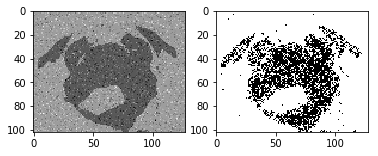

In [4]:
def gibbsSampling(im,tau):

    x = im    
 
    for t in range(tau):
        for i in range(0,height):
            for j in range(0,width):
                
                z = np.random.uniform(0, 1)
                a = energy(x,im,neighbours(i,j,height,width),1,(i,j),2,1)
                b = energy(x,im,neighbours(i,j,height,width),-1,(i,j),2,1)
                
                p = a / (a+b)
                
                if ( z > p ):
                    x[(i,j)] = 1
                else:
                    x[(i,j)] = -1

    return x

prop = 0.4


varSigma = 0.4
im = imread('pug-done.jpg')
im = im/255

fig2 = plt.figure()

im2 = add_gaussian_noise(im,prop,varSigma)
ax8 = fig2.add_subplot(121)
ax8.imshow(im2,cmap="gray")


im3 = gibbsSampling(im2,1)
ax9 = fig2.add_subplot(122)
ax9.imshow(im2,cmap="gray")


plt.show()



## Question 3

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


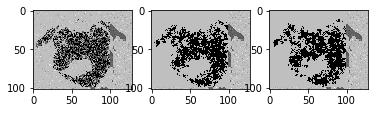

In [5]:
np.random.seed(20)
def gibbsAltered(im,tau):

    x = im   
 
    
    for t in range(tau):
        for i_ in range(0,height):
            for j_ in range(0,width):
                r = np.random.rand(200) * 100
                i = r[i_]
                np.random.shuffle(r)
                j = r[i_]
                i = int(i)
                j = int(j)
            
            
                distribution = np.random.uniform(0,1)

                if(distribution > 0.3):
                    z = np.random.uniform(0, 1)
                    a = energy(x,im,neighbours(i,j,height,width),1,(i,j),2,1)
                    b = energy(x,im,neighbours(i,j,height,width),-1,(i,j),2,1)

                    p = a / (a+b)

                    if ( z > p ):
                        x[(i,j)] = 1
                    else:
                        x[(i,j)] = -1  
    return x

prop = 0.4


varSigma = 0.2
im = imread('pug-done.jpg')
im = im/255

fig2 = plt.figure()

im2 = add_gaussian_noise(im,prop,varSigma)
ax8 = fig2.add_subplot(131)
ax8.imshow(im2,cmap="gray")

im5 = gibbsAltered(im2,1)
ax9 = fig2.add_subplot(131)
ax9.imshow(im2,cmap="gray")

im3 = gibbsAltered(im2,5)
ax9 = fig2.add_subplot(132)
ax9.imshow(im2,cmap="gray")

im4 = gibbsAltered(im2,10)
ax9 = fig2.add_subplot(133)
ax9.imshow(im2,cmap="gray")

plt.show()



## Question 4

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


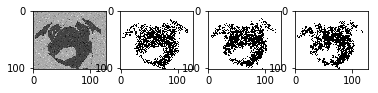

In [6]:
prop = 0.4

varSigma = 0.2
im = imread('pug-done.jpg')
im = im/255

fig5 = plt.figure()

im2 = add_gaussian_noise(im,prop,varSigma)
ax10 = fig5.add_subplot(141)
ax10.imshow(im2,cmap="gray")


im4 = gibbsSampling(im2,1)
ax10 = fig5.add_subplot(142)
ax10.imshow(im2,cmap="gray")

im3 = gibbsSampling(im2,5)
ax10 = fig5.add_subplot(143)
ax10.imshow(im2,cmap="gray")

im5 = gibbsSampling(im2,10)
ax10 = fig5.add_subplot(144)
ax10.imshow(im2,cmap="gray")

plt.show()


## Question 6

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


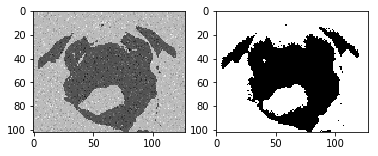

In [7]:
def weight(i,j,neighbour):
    w = 0
    if(i == neighbour[0]):
        w = 0.25
    elif( j == neighbour[1]):
        w = 0.25
    else:
        w = 0.15
        
    return w
        

def variationalBayes(im,tau):
    # INITIALISATION
    x = np.copy(im)
    mu = np.copy(x)
    m= 2.5
    I = im.shape[0] 
    J = im.shape[1] 
    for i in range(0,I):
        for j in range(0,J):
            a = energy(x,im,neighbours(i,j,I,J),1,(i,j),2,1)
            b = energy(x,im,neighbours(i,j,I,J),-1,(i,j),2,1)
            mu[(i,j)] = np.tanh(m + 0.5*(np.log((a+0.0001)/(b+0.0001))))
    
    # ALGORITHM
    m = 0
    for t in range(tau):
        for i in range(0,I):
            for j in range(0,J):
                nbs  = neighbours(i,j,I,J)
                a = energy(x,im,nbs,1,(i,j),2,1)
                b = energy(x,im,nbs,-1,(i,j),2,1)
                for n in range(0,len(nbs)):
                    m += weight(i,j,nbs[n]) * mu[nbs[n]]
                mu[(i,j)] = np.tanh(m + 0.5*(np.log((a+0.0001)/(b+0.0001))))  
                if(mu[(i,j)] > 0):
                     x[(i,j)] = -1
                else:
                     x[(i,j)] = 1
                m = 0

    return x

prop = 0.4

 
varSigma = 0.2
im = imread('pug-done.jpg')
im = im/255

fig6 = plt.figure()

im6_1 = add_gaussian_noise(im,prop,varSigma)
axq6_1 = fig6.add_subplot(121)
axq6_1.imshow(im6_1,cmap="gray") 

im6_2 = variationalBayes(im6_1,1)
axq6_2 = fig6.add_subplot(122)
axq6_2.imshow(im6_2,cmap="gray")

plt.show()

# Question 8

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


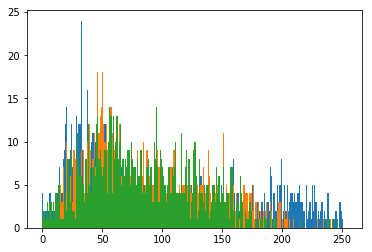

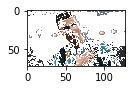

In [8]:
from sklearn.cluster import KMeans

prop = 0.4
varSigma = 0.2
original = imread('ronaldo7.jpg')

ronaldoRGB = imread('ronaldoRGB7.jpg')

height = ronaldoRGB.shape[0]
width = ronaldoRGB.shape[1]


background = [255,0,0]

foreground = [0,255,0]

def evaluate(pixel, standard):
    equal = True
    
    
    if (standard[0] == 255):
        if (not (pixel[0] > 200 and pixel[1] < 15 and pixel[2] < 15)):
            equal = False
    else:
        if (not (pixel[0] < 15 and pixel[1] > 200 and pixel[2] < 15)):
            equal = False
    return equal



def segmentation(ronaldoRGB):
    copy = np.zeros((height,width))
    for i in range(height):
        for j in range(width):
            if (evaluate(ronaldoRGB[i][j],foreground)):
                copy[i][j] = 1
            elif (evaluate(ronaldoRGB[i][j],background)):
                copy[i][j] = -1
            else:
                copy[i][j] = 0
    return histogram(copy, ronaldoRGB)


def histogram(copy, ronaldoRGB):
    foreground_R = []
    foreground_G = []
    foreground_B = []
    
    background_R = []
    background_G = []
    background_B = []
    
    dummy = 0

    for i in range (height):
        for j in range (width):
            dummy = 1
            if (copy[i][j] == 1):
                foreground_R.append(original[i][j][0])
                foreground_G.append(original[i][j][1])
                foreground_B.append(original[i][j][2])
            elif (copy[i][j] == -1):
                background_R.append(original[i][j][0])
                background_G.append(original[i][j][1])
                background_B.append(original[i][j][2])

   
    plt.hist(foreground_R,bins=range(0,255))
    plt.hist(foreground_G,bins=range(0,255))
    plt.hist(foreground_B,bins=range(0,255))
    
    foregroundhistR = np.histogram(foreground_R, bins=255)
    foregroundhistG = np.histogram(foreground_G, bins=255)
    foregroundhistB = np.histogram(foreground_B, bins=255)

    backgroundhistR = np.histogram(background_R, bins=255)
    backgroundhistG = np.histogram(background_G, bins=255)
    backgroundhistB = np.histogram(background_B, bins=255)
    
    
    return cr7(foreground_R, foreground_G, foreground_B, background_R, background_G, background_B)
        
        
def cr7(foreground_R, foreground_G, foreground_B, background_R, background_G, background_B):
    result = np.copy(original)
    for i in range (height):
        for j in range (width):
            if (compare(original[i][j],foreground_R, foreground_G, foreground_B, background_R, background_G, background_B)):
                result[i][j][0] = 255
                result[i][j][1] = 255
                result[i][j][2] = 255
    return result

def compare(ronaldoPixel, foreground_R, foreground_G, foreground_B, background_R, background_G, background_B):
    
    backgroundVotes = 0
    foregroundVotes = 0

    if (distance.euclidean(ronaldoPixel[0],(foreground_R.count(ronaldoPixel[0]))) < distance.euclidean(ronaldoPixel[0],background_R.count(ronaldoPixel[0]))):
        foregroundVotes = foregroundVotes + 1
    
    else:
        backgroundVotes = backgroundVotes + 1
        
    
    if (distance.euclidean(ronaldoPixel[1],foreground_G.count(ronaldoPixel[1])) < distance.euclidean(ronaldoPixel[1],background_G.count(ronaldoPixel[1]))):
        foregroundVotes = foregroundVotes + 1

    else:

        backgroundVotes = backgroundVotes + 1
    
    if (distance.euclidean(ronaldoPixel[2],foreground_B.count(ronaldoPixel[2])) < distance.euclidean(ronaldoPixel[2],background_B.count(ronaldoPixel[2]))):

        foregroundVotes = foregroundVotes + 1

    else:

        backgroundVotes = backgroundVotes + 1
    
    if (foregroundVotes < backgroundVotes):
        return True
    else:
        return False


result = segmentation(ronaldoRGB)
fig20 = plt.figure()

ax98 = fig20.add_subplot(132)
ax98.imshow(result,cmap="gray")

